In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath = '/Users/kaivalyasatav/Documents/Codesoft/Task 5 Creditcardfraud/creditcard.csv'

In [4]:
data = pd.read_csv(filepath)

In [5]:
print("Dataset Information:")
print(data.info())
print("\nSample Rows:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [6]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
scaler = StandardScaler()
data['Normalized_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount'], axis=1)

In [13]:
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

In [14]:
non_fraud_downsampled = non_fraud.sample(len(fraud), random_state=42)


In [15]:
balanced_data = pd.concat([fraud, non_fraud_downsampled])

In [16]:
balanced_data = balanced_data.sample(frac=1, random_state=42)

In [17]:
X = balanced_data.drop(['Class'], axis=1)
y = balanced_data['Class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[128   6]
 [ 16 146]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       134
           1       0.96      0.90      0.93       162

    accuracy                           0.93       296
   macro avg       0.92      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [22]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

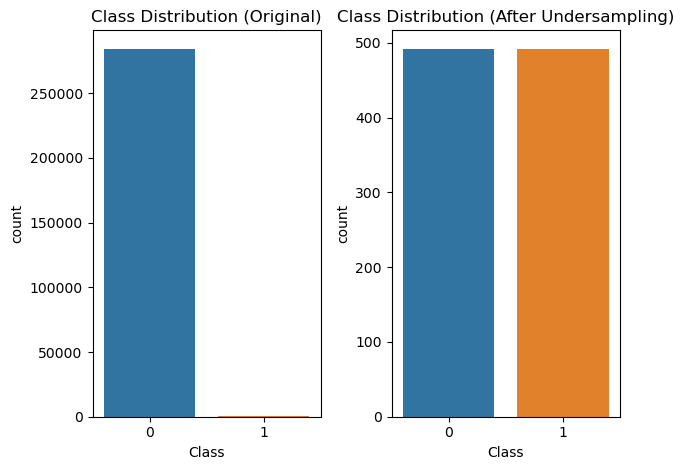

In [23]:
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Original)")

plt.subplot(1, 2, 2)
sns.countplot(x=y)
plt.title("Class Distribution (After Undersampling)")

plt.tight_layout()
plt.show()